In [14]:
 # @ https://finance.yahoo.com/quote/MSFT/history/

In [15]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv("MSFT (1).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
1,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
2,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
3,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
4,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059089,58435200


In [17]:
df.shape

(9567, 7)

In [18]:
data = df.filter(["Close"])
dataset = data.values

In [19]:
# Get training data length
training_data_len = math.ceil(len(dataset) * 0.8)

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.47728849e-05],
       [2.89040774e-05],
       [2.27084778e-05],
       ...,
       [9.68915031e-01],
       [9.69485811e-01],
       [9.83565671e-01]])

In [21]:
train_data = scaled_data[0: training_data_len, :]
x_train = []
y_train = []

for i in  range (60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])


In [22]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in  range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])



In [23]:
x_train, y_train, x_test = np.array(x_train), np.array(y_train), np.array(x_test)
x_train

array([[2.47728849e-05, 2.89040774e-05, 2.27084778e-05, ...,
        6.81301902e-05, 6.81301902e-05, 5.57413694e-05],
       [2.89040774e-05, 2.27084778e-05, 1.85796637e-05, ...,
        6.81301902e-05, 5.57413694e-05, 5.57413694e-05],
       [2.27084778e-05, 1.85796637e-05, 1.23864424e-05, ...,
        5.57413694e-05, 5.57413694e-05, 5.57413694e-05],
       ...,
       [1.23721065e-01, 1.22127566e-01, 1.20938391e-01, ...,
        1.27502640e-01, 1.28121006e-01, 1.26051845e-01],
       [1.22127566e-01, 1.20938391e-01, 1.18464915e-01, ...,
        1.28121006e-01, 1.26051845e-01, 1.32758789e-01],
       [1.20938391e-01, 1.18464915e-01, 1.18393558e-01, ...,
        1.26051845e-01, 1.32758789e-01, 1.32497168e-01]])

In [24]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
model.compile(optimizer="adam", loss = "mean_squared_error")

In [27]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

7594/7594 [==============================] - 264s 34ms/step - loss: 2.7586e-05


In [28]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

60/60 [==============================] - 2s 18ms/step


<ipython-input-31-07c6dd2a0431>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["Predictions"] = pred


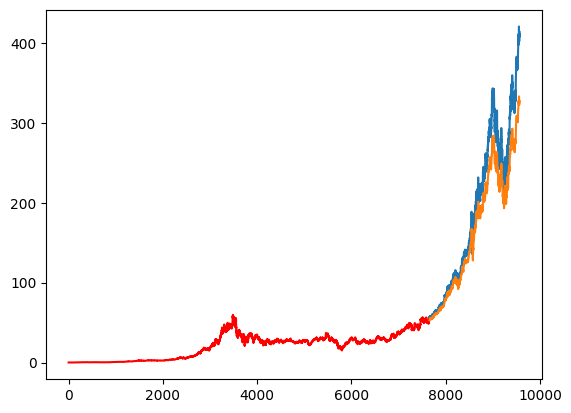

In [31]:
train = data[:training_data_len]
val = data[training_data_len:]
val["Predictions"] = pred

plt.plot(train["Close"], color = "r")
plt.plot(val[["Close", "Predictions"]])
